<a href="https://colab.research.google.com/github/sagarrepala/BharatIntern/blob/main/iris_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sys

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates, andrews_curves, radviz, scatter_matrix
import seaborn as sns

import sklearn
from scipy import stats

from IPython.display import set_matplotlib_formats
matplotlib.style.use('ggplot') # Other styles matplotlib.style.available
import os
from warnings import filterwarnings
filterwarnings('ignore')

%matplotlib inline
sns.set_context('notebook')
plt.close('all')

In [4]:
import pandas as pd

url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv'
iris = pd.read_csv(url)
iris.rename(columns={'Name': 'species'}, inplace=True)



In [5]:
print(iris.info())
iris.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [6]:
iris.species = iris.species.astype('category')
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [7]:
metrics = ['count', 'min', 'max', 'mean','std','skew']
iris.groupby(by='species').agg(metrics)

sepal_length                                      sepal_width       \
                  count  min  max   mean       std      skew       count  min   
species                                                                         
setosa               50  4.3  5.8  5.006  0.352490  0.120087          50  2.3   
versicolor           50  4.9  7.0  5.936  0.516171  0.105378          50  2.0   
virginica            50  4.9  7.9  6.588  0.635880  0.118015          50  2.2   

                        ... petal_length                             \
            max   mean  ...          max   mean       std      skew   
species                 ...                                           
setosa      4.4  3.428  ...          1.9  1.462  0.173664  0.106394   
versicolor  3.4  2.770  ...          5.1  4.260  0.469911 -0.606508   
virginica   3.8  2.974  ...          6.9  5.552  0.551895  0.549445   

           petal_width                                       
                 count  min  max   mean       std      skew  
species                                                      
setosa              50  0.1  0.6  0.246  0.105386  1.253861  
versicolor          50  1.0  1.8  1.326  0.197753 -0.031180  
virginica           50  1.4  2.5  2.026  0.274650 -0.129477  

[3 rows x 24 columns]

In [8]:
iris.apply('kurtosis')

sepal_length   -0.552064
sepal_width     0.228249
petal_length   -1.402103
petal_width    -1.340604
dtype: float64

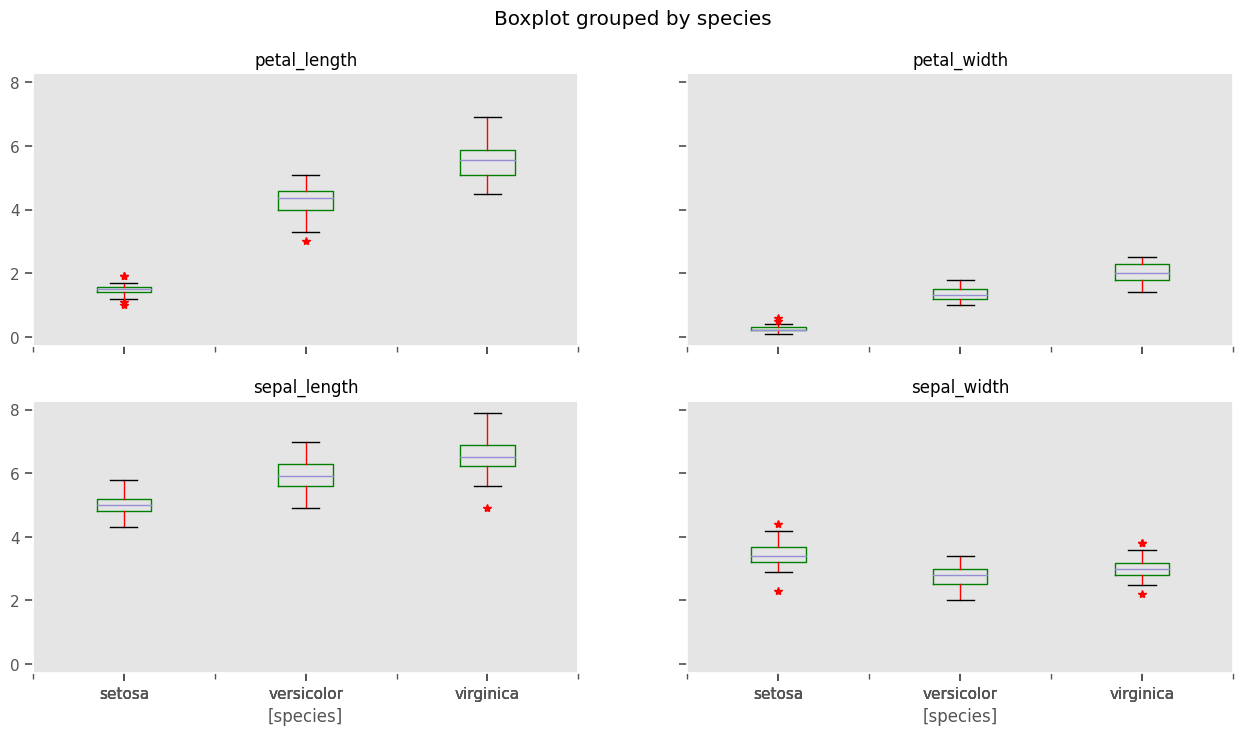

In [9]:
iris.boxplot(by='species', figsize=(15, 8),color={'boxes':'Green','whiskers':'Red'},sym='r*', grid=False)
plt.show()

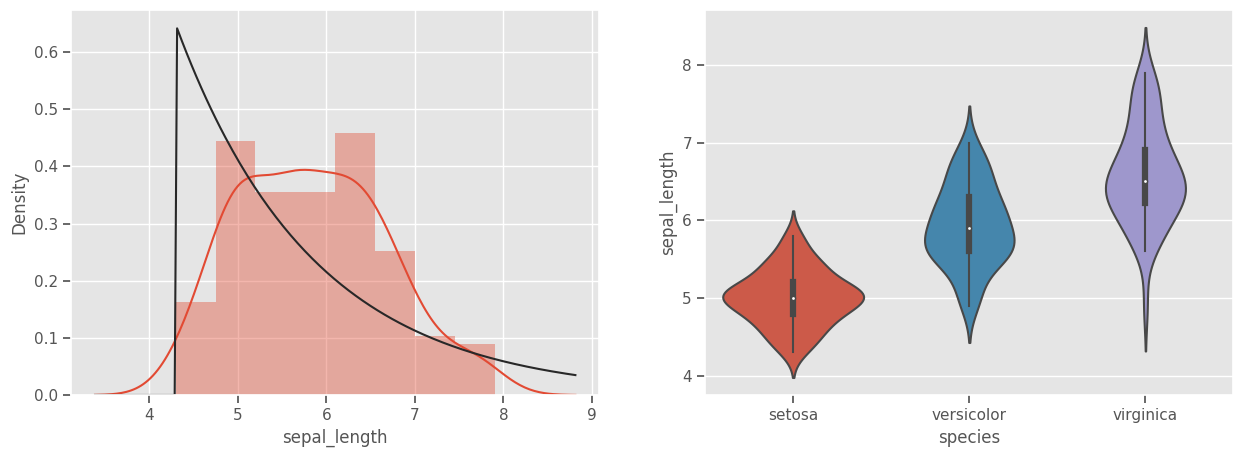

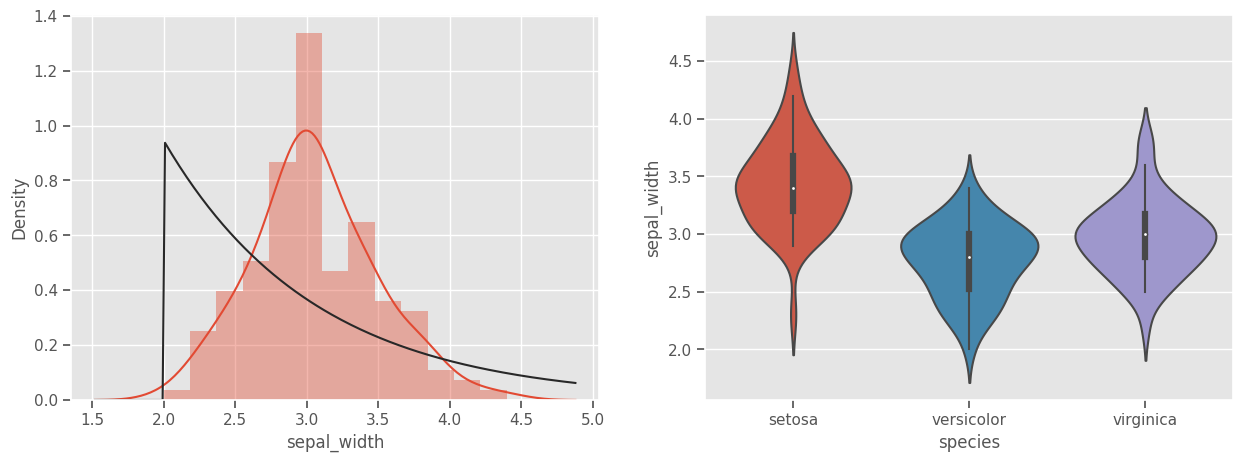

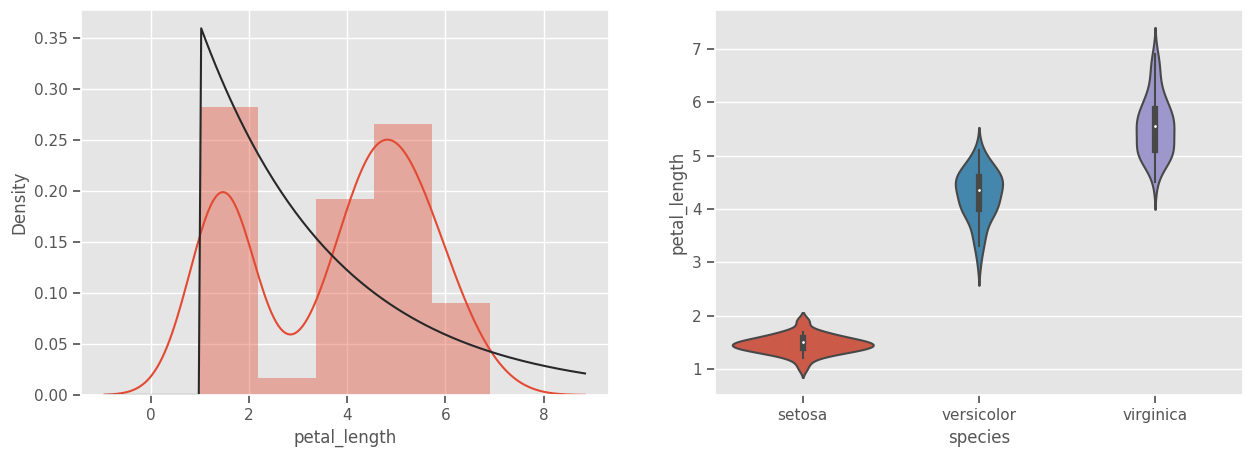

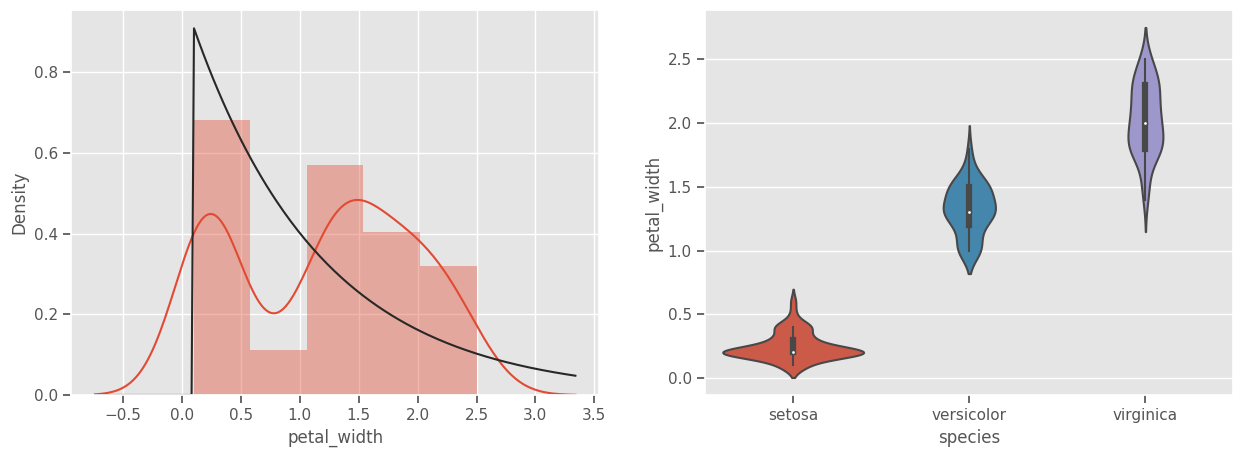

In [14]:
feats = iris.drop(columns=['species'])
for col in feats.columns:
  fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(15,5), sharex=False)
  sns.distplot(iris[col],fit=stats.expon,hist=True,kde=True,ax=ax1)
  sns.violinplot(data=iris,x='species',y=col,inner='box',ax=ax2)
  plt.show()

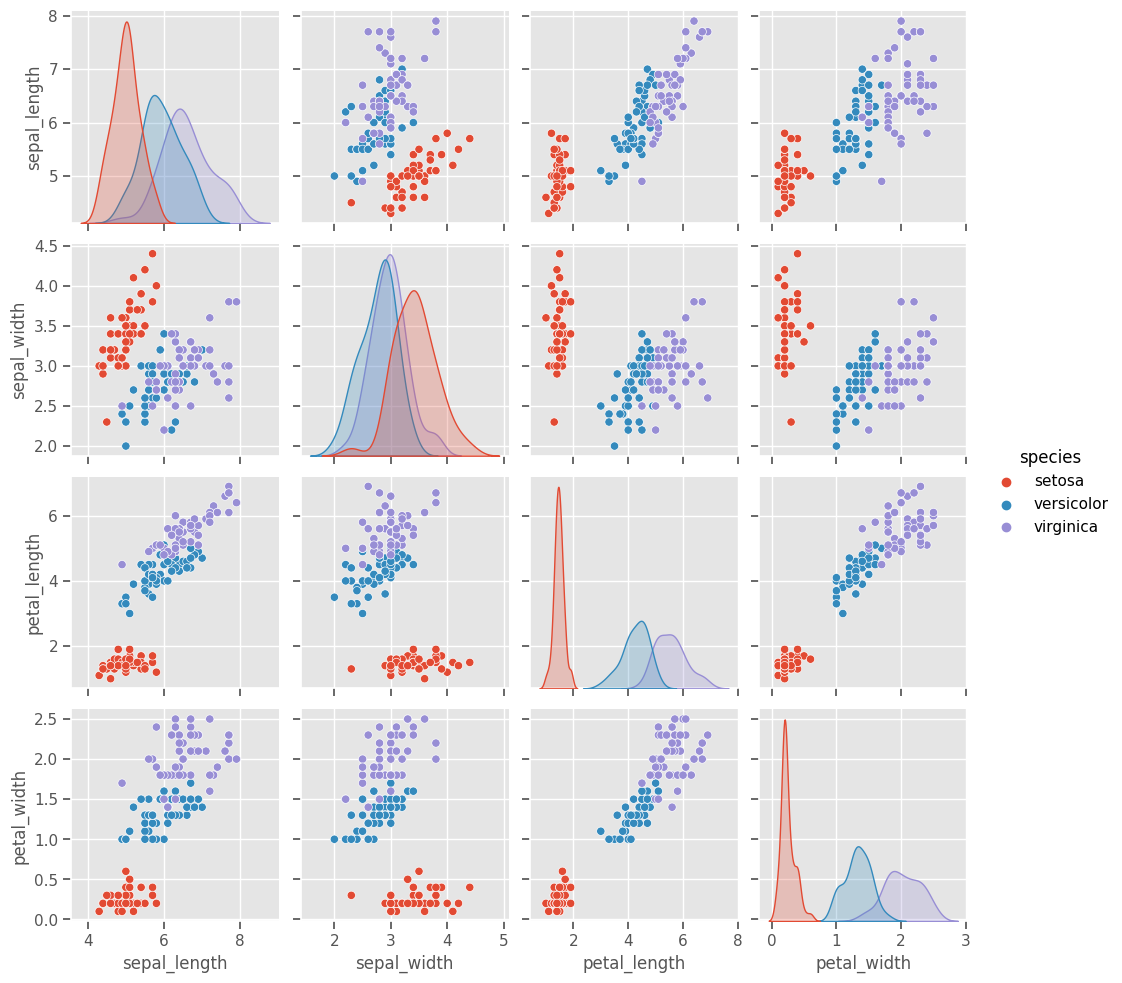

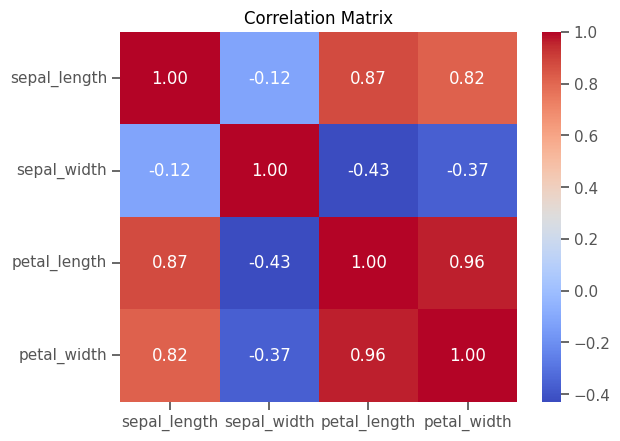

In [16]:
sns.pairplot(iris, hue='species', markers='o')
plt.show()

# Correlation matrix
correlation_matrix = iris.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

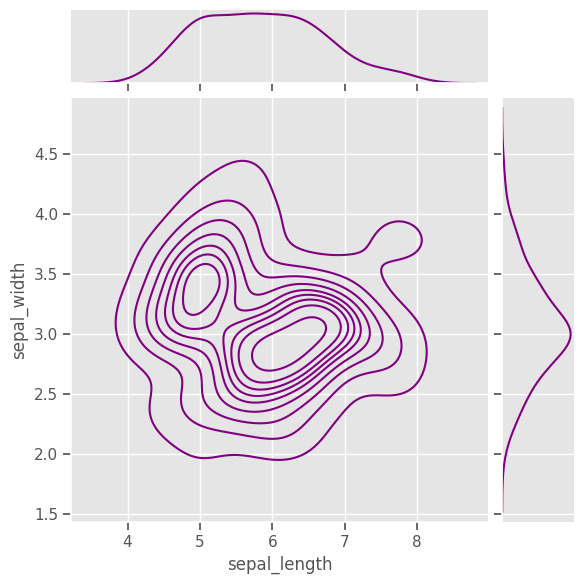

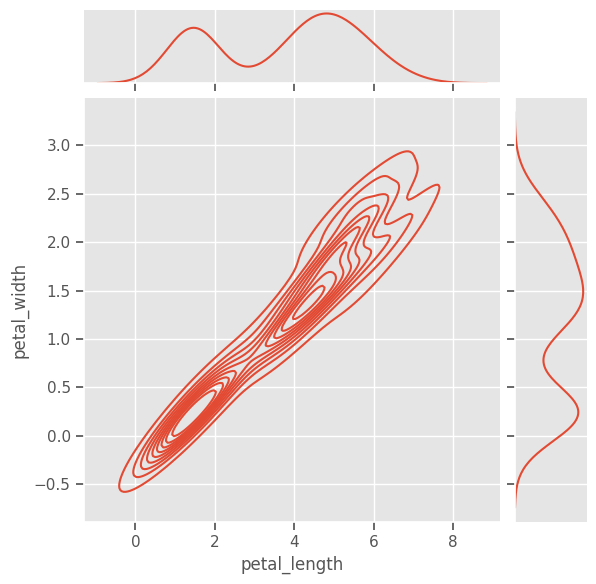

In [18]:
sns.jointplot(data=iris, x='sepal_length', y='sepal_width', kind='kde', color='Purple')
sns.jointplot(data=iris, x='petal_length', y='petal_width', kind='kde')
plt.savefig("kde.png")
plt.show()

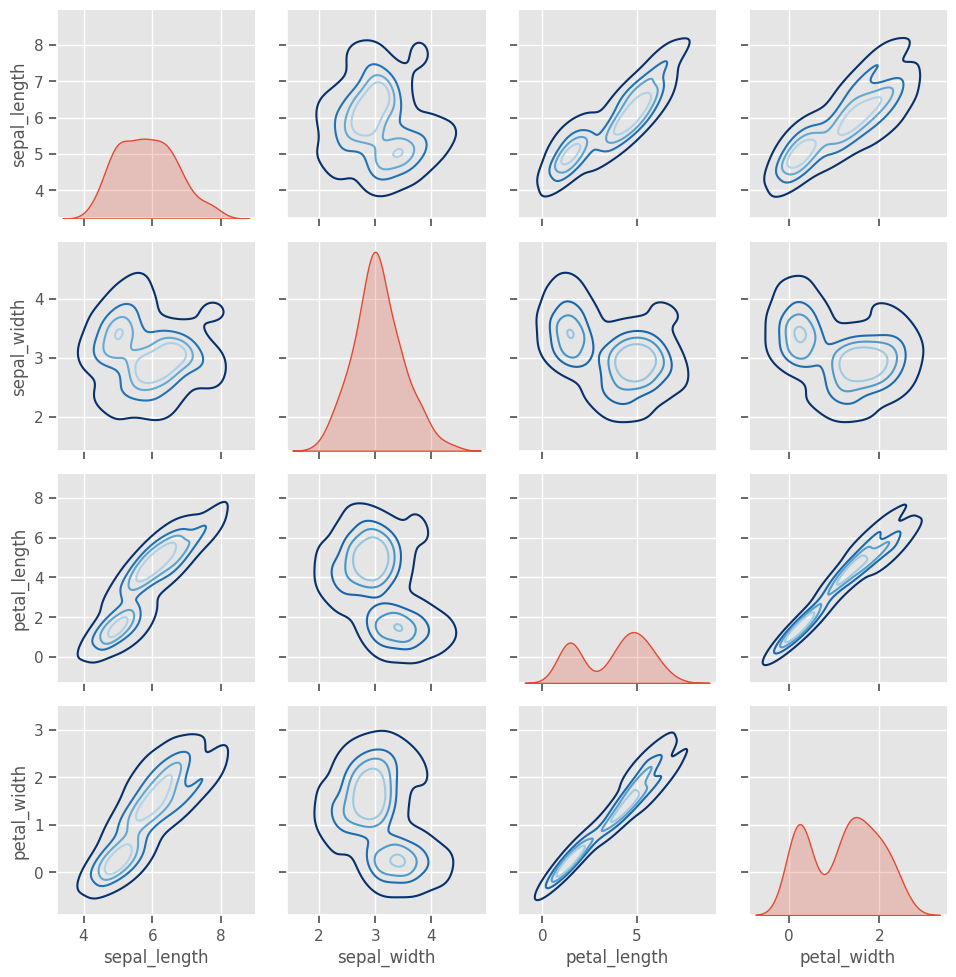

In [22]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot, shade=True)
g.map_offdiag(sns.kdeplot, cmap="Blues_r", n_levels=5)
plt.show()

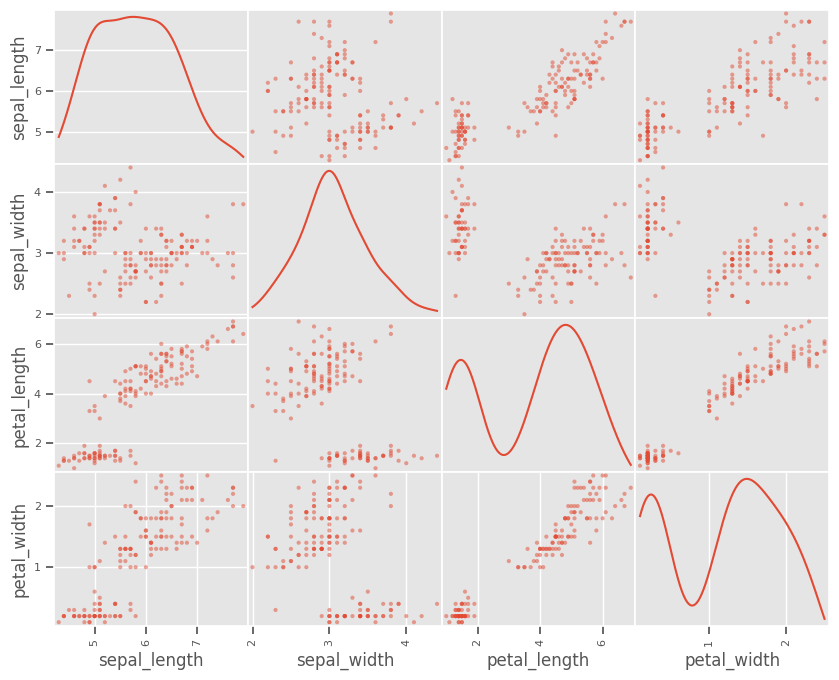

In [23]:
scatter_matrix(iris, figsize=(10,8), diagonal='kde')
plt.show()

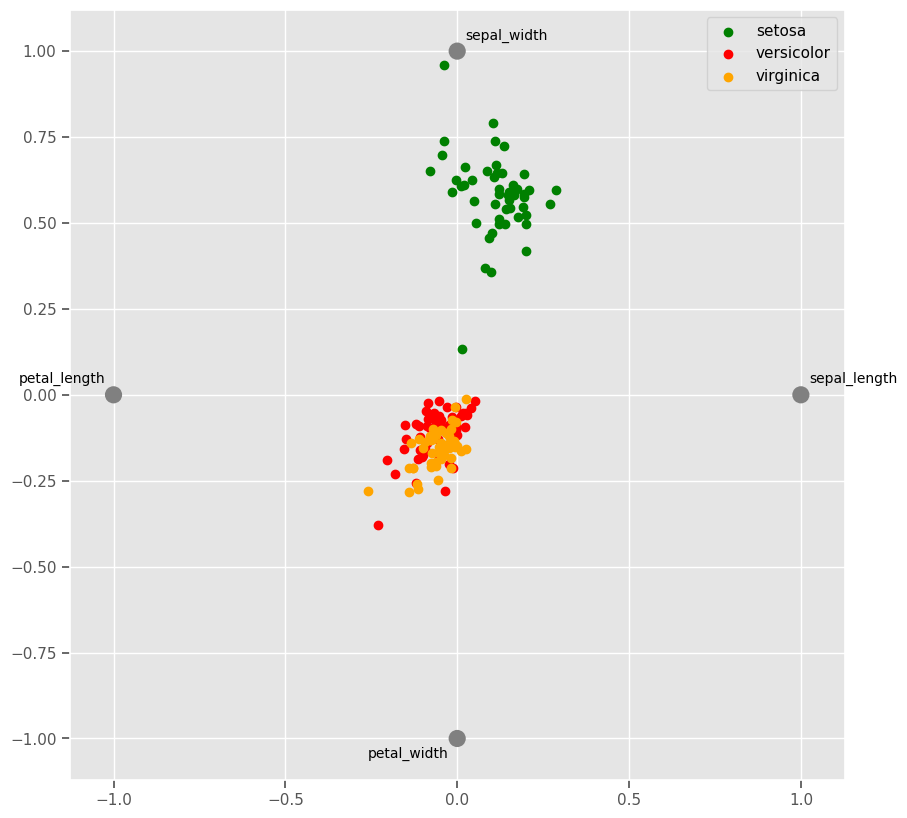

In [24]:
plt.figure(figsize=(10, 10))
radviz(iris, 'species',color=['Green','Red','Orange'])
plt.savefig("radviz.png")
plt.show()

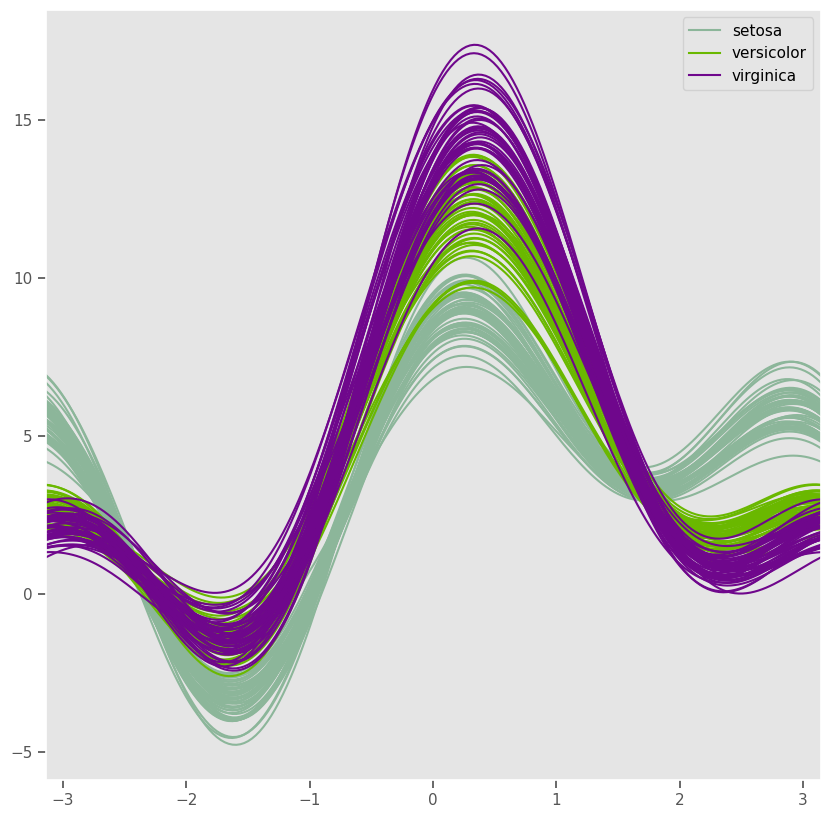

In [25]:
plt.figure(figsize=(10, 10))
andrews_curves(iris, 'species')
plt.savefig("andrew_curve.png")
plt.show()

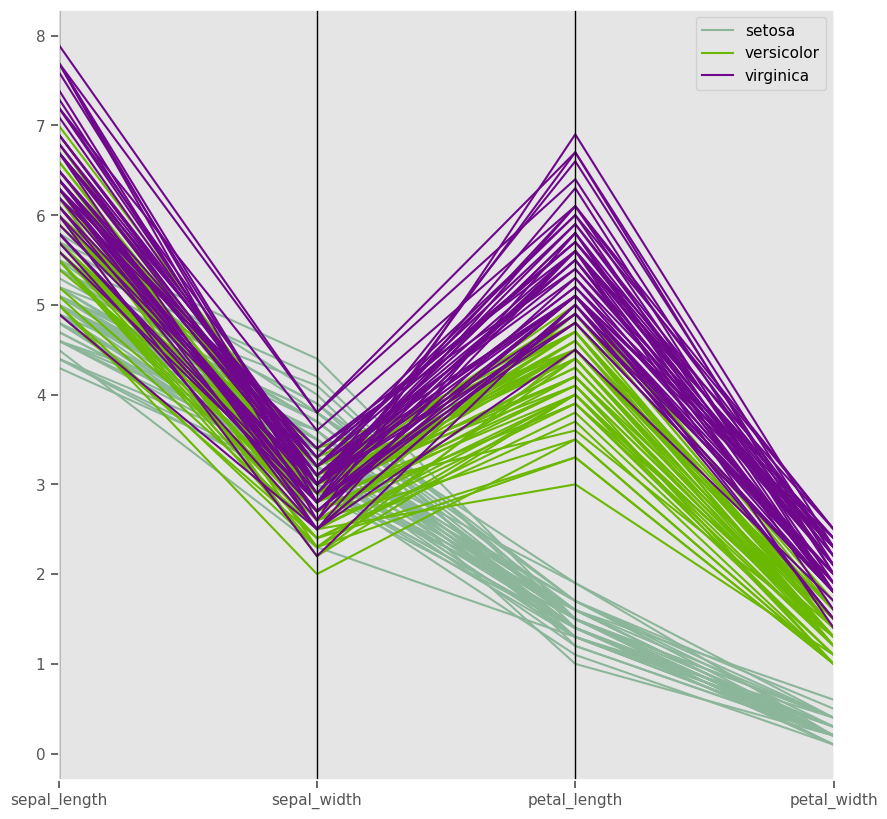

In [26]:
plt.figure(figsize=(10, 10))
parallel_coordinates(iris, 'species')
plt.show()

In [27]:
data = iris.copy()
X = data.drop(columns=['species'])
y = iris['species'] # k-means does not handle categories, unless labelencoded or dummy variables are created.
y.unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['setosa', 'versicolor', 'virginica']

In [33]:
!pip install orca psutil requests
!pip install -U kaleido

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 12.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvicorn, which is not installed.


In [34]:
import plotly.express as px

fig = px.scatter_3d(iris, x='petal_length', y='sepal_width', z='petal_width', color='species', title="Iris dataset ground truth")
fig.write_image("iris_3d.png")  # Uncomment this line to save the image
fig.show()


ValueError: ignored

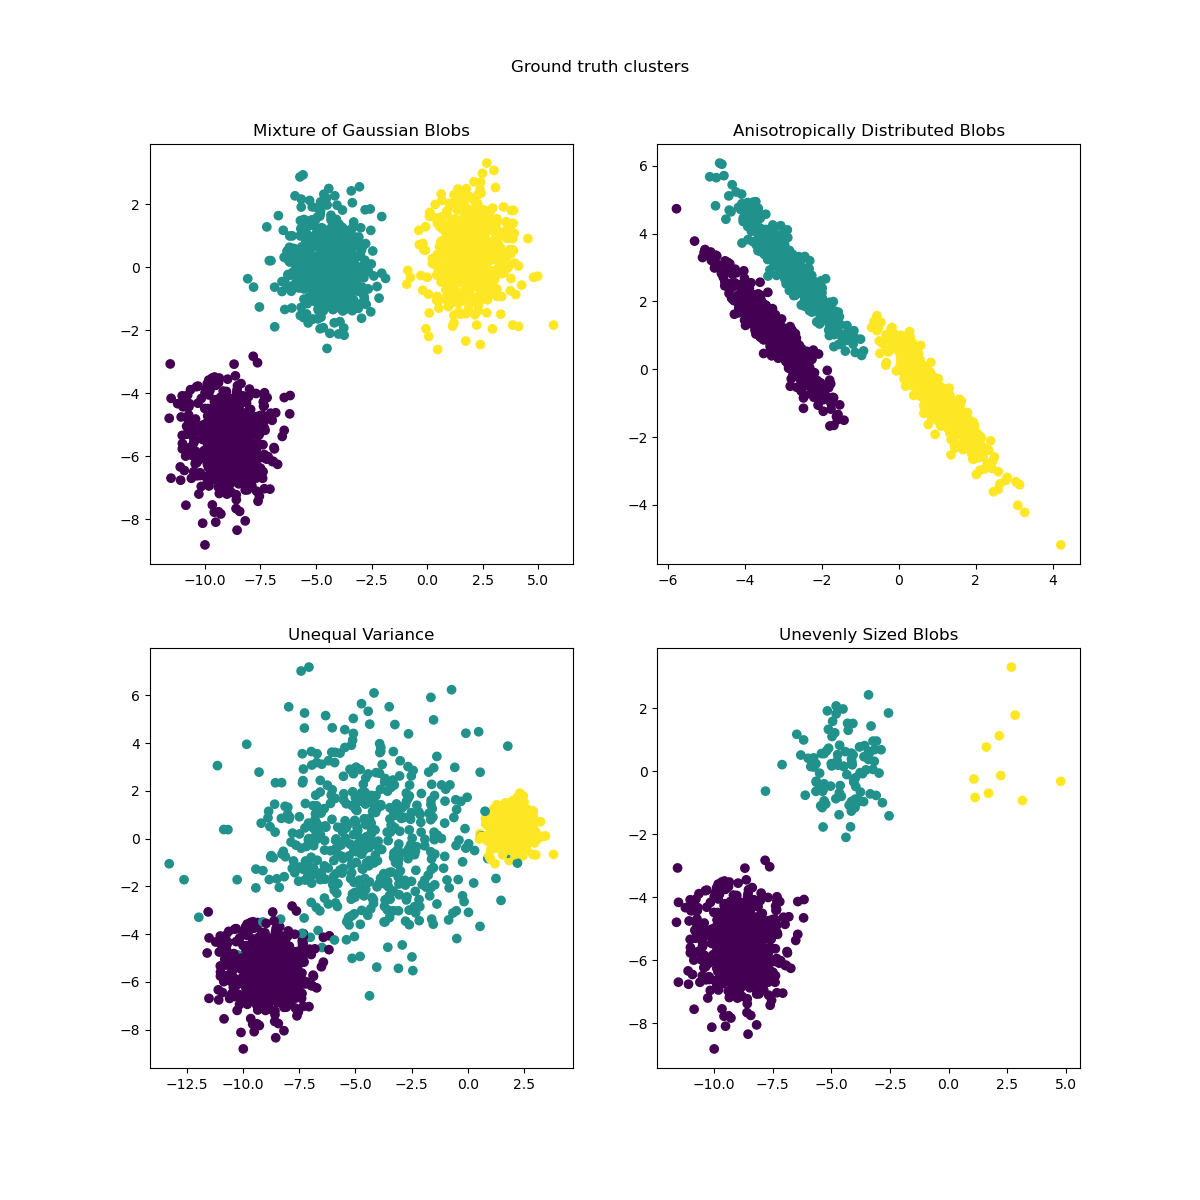

In [35]:
from IPython.display import Image, display
image = 'https://scikit-learn.org/stable/_images/sphx_glr_plot_kmeans_assumptions_001.png'
display(Image(image,width=700,height=700))

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import numpy as np

# Assuming X is your feature matrix
# X = ...

# Example data generation (replace this with your actual data)
np.random.seed(42)
X = np.random.rand(100, 2)

for n_cluster in range(2, 11):
    kmeans = KMeans(n_clusters=n_cluster, random_state=42).fit(X)
    labels = kmeans.labels_
    sil_coeff = silhouette_score(X, labels, metric='euclidean')
    print(f"{n_cluster} n_clusters: Silhouette Coefficient = {sil_coeff}")


2 n_clusters: Silhouette Coefficient = 0.3860088301200343
3 n_clusters: Silhouette Coefficient = 0.42967869588128577
4 n_clusters: Silhouette Coefficient = 0.43244665843202496
5 n_clusters: Silhouette Coefficient = 0.42359047936206395
6 n_clusters: Silhouette Coefficient = 0.3947903453456849
7 n_clusters: Silhouette Coefficient = 0.4080411324866906
8 n_clusters: Silhouette Coefficient = 0.42939815658106645
9 n_clusters: Silhouette Coefficient = 0.4310314285362525
10 n_clusters: Silhouette Coefficient = 0.43802153796029364


For 2 clusters: average silhouette_score is 0.3860088301200343
For 3 clusters: average silhouette_score is 0.42967869588128577
For 4 clusters: average silhouette_score is 0.43244665843202496
For 5 clusters: average silhouette_score is 0.42359047936206395
For 6 clusters: average silhouette_score is 0.3947903453456849
For 7 clusters: average silhouette_score is 0.4080411324866906
For 8 clusters: average silhouette_score is 0.42939815658106645


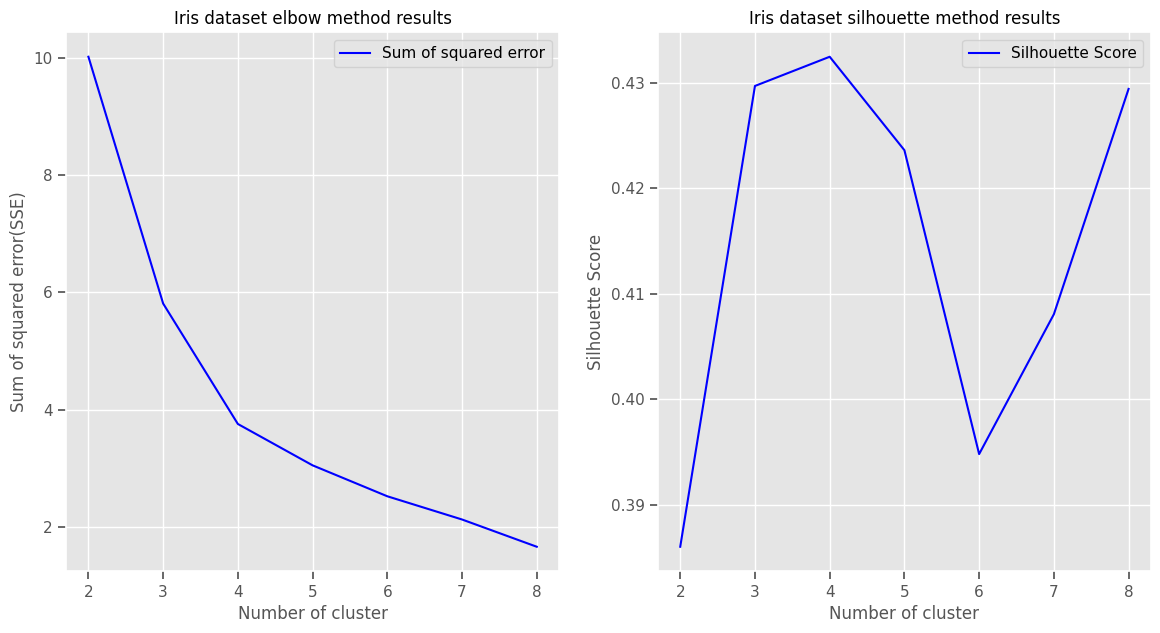

In [40]:
range_n_clusters = range(2,9)
elbow = []
ss = []
for n_clusters in range_n_clusters:
   #iterating through cluster sizes
   clusterer = KMeans(n_clusters = n_clusters, random_state=42)
   cluster_labels = clusterer.fit_predict(X)
   #Finding the average silhouette score
   silhouette_avg = silhouette_score(X, cluster_labels)
   ss.append(silhouette_avg)
   print(f"For {n_clusters} clusters: average silhouette_score is {silhouette_avg}")
   #Finding the average SSE"
   elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center

fig = plt.figure(figsize=(14,7))

fig.add_subplot(121)
plt.title("Iris dataset elbow method results")
plt.plot(range_n_clusters, elbow,'b-',label='Sum of squared error')
plt.xlabel("Number of cluster")
plt.ylabel("Sum of squared error(SSE)")
plt.legend()

fig.add_subplot(122)
plt.title("Iris dataset silhouette method results")
plt.plot(range_n_clusters, ss,'b-',label='Silhouette Score')
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

In [43]:
from sklearn.cluster import KMeans

# Create a KMeans model with specified parameters
model = KMeans(
    n_clusters=3,    # Number of clusters
    n_init=1,        # Number of times the algorithm will be run with different centroid seeds
    init='random',   # Initialization method for centroids
    max_iter=10000,   # Maximum number of iterations for a single run
    random_state=21,  # Seed for random number generation
    algorithm="auto"  # Algorithm to use ("auto" selects the most efficient one based on the dataset)
)

# Fit the model to the data
fitted_model = model.fit(X)

# Get cluster labels for each data point
labels = model.labels_

# Obtain cluster centers
centers = pd.DataFrame(fitted_model.cluster_centers_)

# Print cluster centers
print(f'Cluster centers: \n {centers}')


Cluster centers: 
           0         1
0  0.172848  0.591879
1  0.768550  0.712250
2  0.593867  0.199277
